<a href="https://colab.research.google.com/github/jessejk484/Jashwanthkalyan_INFO5731_SPRING2023/blob/main/In_class_exercise_04_03282023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [231]:
import requests, csv
from bs4 import BeautifulSoup
import pandas as pd
from pprint import pprint

url = "https://www.imdb.com/title/tt5113044/reviews?ref_=tt_urv"
data = requests.get(url)
soup = BeautifulSoup(data.content, 'html.parser')

imdb_reviews=[]
right_table=soup.find('div', {'class':"lister"})
for i in right_table.findAll('div', class_="lister-item mode-detail imdb-user-review collapsable"):
  imdb_reviews.append(i.find("div", class_="text show-more__control").text.strip())
pprint(imdb_reviews)

['For reference, here are my ratings for the other movies: Despicable Me - 9 '
 'stars. Despicable Me 2 - 8 stars. Minions - 6 stars. Despicable Me 3 - 7 '
 'stars.I am so pleasantly surprised that this is the best one since the '
 'original. It fires on all cylinders: comedy, story, visuals, action scenes. '
 'It starts out fast and never lets up. The movie flies by. And it has tons of '
 'great new characters.This movie is absolutely hilarious. I was literally in '
 'tears in some scenes. The minions are at their very best with so many '
 'memorable moments. The story is surprisingly unpredictable and keeps you '
 'invested. The visuals are stunningly beautiful. I was mesmerized. And the '
 'action scenes are pretty epic, the best of the entire series.I had a blast '
 "with this movie. It's definitely worth seeing on a premium screen, greatly "
 "enhancing the visuals and action scenes.P. S. I'm not sure what's up with "
 'all these sarcastic 10 star reviews. I assure you this is not

In [232]:
df = pd.DataFrame({'reviews': imdb_reviews})

df.to_csv('reviews.csv')
df.head()

,reviews
0,"For reference, here are my ratings for the oth..."
1,'Minions: The Rise of Gru' follows 11 3/4 year...
2,"Going to watch ""future best animated picture w..."
3,Its a fun movie. Minion scenes are more than G...
4,This movie has so many references to the sixti...


In [233]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [234]:
import nltk
nltk.download('stopwords')
import os
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
  !java -version
install_java()
!pip install pyLDAvis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


openjdk version "11.0.18" 2023-01-17
OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1)
OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [235]:
!pip install --upgrade gensim
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup
import spacy.cli
spacy.cli.download("en")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [236]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [237]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

rev_data = df['reviews'].values.tolist()
rev_data_words = list(sent_to_words(rev_data))
rev_data_words = remove_stopwords(rev_data_words)
print(rev_data_words[:1])

[['reference', 'ratings', 'movies', 'despicable', 'stars', 'despicable', 'stars', 'minions', 'stars', 'despicable', 'stars', 'pleasantly', 'surprised', 'best', 'one', 'since', 'original', 'fires', 'cylinders', 'comedy', 'story', 'visuals', 'action', 'scenes', 'starts', 'fast', 'never', 'lets', 'movie', 'flies', 'tons', 'great', 'new', 'characters', 'movie', 'absolutely', 'hilarious', 'literally', 'tears', 'scenes', 'minions', 'best', 'many', 'memorable', 'moments', 'story', 'surprisingly', 'unpredictable', 'keeps', 'invested', 'visuals', 'stunningly', 'beautiful', 'mesmerized', 'action', 'scenes', 'pretty', 'epic', 'best', 'entire', 'series', 'blast', 'movie', 'definitely', 'worth', 'seeing', 'premium', 'screen', 'greatly', 'enhancing', 'visuals', 'action', 'scenes', 'sure', 'sarcastic', 'star', 'reviews', 'assure', 'one', 'viewings', 'opening', 'thursday', 'imax', 'imax']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [238]:
bigram = gensim.models.Phrases(rev_data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[rev_data_words], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
data_words_nostops = remove_stopwords(rev_data_words)

data_words_bigrams = make_bigrams(data_words_nostops)


nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['reference', 'rating', 'movie', 'despicable', 'star', 'despicable', 'star', 'minion', 'star', 'despicable', 'star', 'pleasantly', 'surprise', 'good', 'original', 'fire', 'cylinder', 'comedy', 'story', 'visual', 'action', 'scene', 'start', 'fast', 'never', 'let', 'movie', 'fly', 'ton', 'great', 'new', 'character', 'movie', 'absolutely', 'hilarious', 'literally', 'tear', 'scene', 'minion', 'well', 'many', 'memorable', 'moment', 'story', 'surprisingly', 'unpredictable', 'keep', 'invest', 'visual', 'stunningly', 'beautiful', 'mesmerized', 'action', 'scene', 'pretty', 'epic', 'good', 'entire', 'series', 'blast', 'movie', 'definitely', 'worth', 'see', 'premium', 'screen', 'greatly', 'enhance', 'visual', 'action', 'scene', 'sure', 'sarcastic', 'star', 'review', 'assure', 'viewing', 'open', 'thursday', 'imax', 'imax']]


In [239]:
review_id2word = corpora.Dictionary(review_data_lemmatized) 
review_texts = review_data_lemmatized
review_corpus = [review_id2word.doc2bow(text) for text in review_texts] 
print(review_corpus[:1])
[[(review_id2word[i], f) for i, f in c] for c in review_corpus[:1]]

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 4), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 4), (43, 1), (44, 1), (45, 1), (46, 5), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 3), (59, 1), (60, 1)]]


[[('absolutely', 1),
  ('action', 3),
  ('assure', 1),
  ('beautiful', 1),
  ('blast', 1),
  ('character', 1),
  ('comedy', 1),
  ('cylinder', 1),
  ('definitely', 1),
  ('despicable', 3),
  ('enhance', 1),
  ('entire', 1),
  ('epic', 1),
  ('fast', 1),
  ('fire', 1),
  ('fly', 1),
  ('good', 2),
  ('great', 1),
  ('greatly', 1),
  ('hilarious', 1),
  ('imax', 2),
  ('invest', 1),
  ('keep', 1),
  ('let', 1),
  ('literally', 1),
  ('many', 1),
  ('memorable', 1),
  ('mesmerized', 1),
  ('minion', 2),
  ('moment', 1),
  ('movie', 4),
  ('never', 1),
  ('new', 1),
  ('open', 1),
  ('original', 1),
  ('pleasantly', 1),
  ('premium', 1),
  ('pretty', 1),
  ('rating', 1),
  ('reference', 1),
  ('review', 1),
  ('sarcastic', 1),
  ('scene', 4),
  ('screen', 1),
  ('see', 1),
  ('series', 1),
  ('star', 5),
  ('start', 1),
  ('story', 2),
  ('stunningly', 1),
  ('sure', 1),
  ('surprise', 1),
  ('surprisingly', 1),
  ('tear', 1),
  ('thursday', 1),
  ('ton', 1),
  ('unpredictable', 1),
  ('vi

In [240]:
review_id2word[0]


'absolutely'

In [241]:
from pprint import pprint
lda_model = gensim.models.ldamodel.LdaModel(corpus=review_corpus,
                                           id2word=review_id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[review_corpus]

[(0,
  '0.001*"voice" + 0.001*"movie" + 0.001*"minion" + 0.001*"get" + 0.001*"film" '
  '+ 0.001*"make" + 0.001*"gru" + 0.001*"still" + 0.001*"fun" + 0.001*"well"'),
 (1,
  '0.042*"movie" + 0.015*"gru" + 0.015*"minion" + 0.015*"direct" + 0.014*"far" '
  '+ 0.014*"watch" + 0.014*"say" + 0.014*"year" + 0.014*"even" + 0.014*"good"'),
 (2,
  '0.039*"minion" + 0.033*"gru" + 0.022*"make" + 0.017*"rise" + 0.017*"film" + '
  '0.014*"get" + 0.014*"villain" + 0.011*"character" + 0.011*"wild" + '
  '0.011*"vicious"'),
 (3,
  '0.025*"movie" + 0.016*"well" + 0.013*"character" + 0.013*"minion" + '
  '0.013*"moment" + 0.012*"film" + 0.012*"work" + 0.011*"get" + 0.011*"make" + '
  '0.010*"voice"'),
 (4,
  '0.053*"movie" + 0.034*"voice" + 0.031*"minion" + 0.024*"despicable" + '
  '0.023*"film" + 0.020*"gru" + 0.018*"story" + 0.018*"rise" + 0.015*"child" + '
  '0.015*"review"'),
 (5,
  '0.025*"movie" + 0.019*"kid" + 0.019*"joke" + 0.013*"minion" + 0.013*"much" '
  '+ 0.013*"however" + 0.013*"animation" 

In [242]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=review_data_lemmatized, dictionary=review_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.27211834659034306


In [243]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=review_corpus,
                                           id2word=review_id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
start, limit, step=2, 20, 2
model_list, coherence_values = compute_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=review_data_lemmatized, start=start, limit=limit, step=step)
cohe_val = []
for m, cv in zip(range(start, limit, step), coherence_values):
    cohe_val.append(round(cv,4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.291
Num Topics = 4  has Coherence Value of 0.3003
Num Topics = 6  has Coherence Value of 0.2812
Num Topics = 8  has Coherence Value of 0.267
Num Topics = 10  has Coherence Value of 0.3046
Num Topics = 12  has Coherence Value of 0.308
Num Topics = 14  has Coherence Value of 0.2645
Num Topics = 16  has Coherence Value of 0.3039
Num Topics = 18  has Coherence Value of 0.2805


In [244]:
sum(cohe_val)/len(cohe_val)


0.289

In [245]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, review_corpus, review_id2word)

pyLDAvis.display(LDAvis_prepared)

In [246]:
optimal_model = model_list[3] # getting the topics=8 model, which is in 3rd index of our model and getting the 8 topics.
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.029*"minion" + 0.022*"movie" + 0.022*"good" + 0.015*"make" + 0.015*"even" '
  '+ 0.011*"get" + 0.011*"despicable" + 0.011*"villain" + 0.011*"think" + '
  '0.008*"rise"'),
 (1,
  '0.030*"gru" + 0.027*"minion" + 0.022*"make" + 0.019*"movie" + 0.017*"rise" '
  '+ 0.014*"villain" + 0.011*"character" + 0.011*"wild" + 0.008*"watch" + '
  '0.008*"film"'),
 (2,
  '0.026*"minion" + 0.026*"voice" + 0.020*"film" + 0.018*"movie" + 0.012*"gru" '
  '+ 0.012*"joke" + 0.012*"get" + 0.009*"still" + 0.009*"kid" + '
  '0.009*"vicious"'),
 (3,
  '0.024*"movie" + 0.014*"well" + 0.012*"minion" + 0.012*"character" + '
  '0.011*"film" + 0.011*"moment" + 0.011*"work" + 0.010*"make" + 0.010*"get" + '
  '0.009*"time"'),
 (4,
  '0.029*"minion" + 0.024*"film" + 0.024*"movie" + 0.015*"despicable" + '
  '0.012*"well" + 0.012*"fun" + 0.012*"franchise" + 0.012*"enough" + '
  '0.012*"rise" + 0.012*"gru"'),
 (5,
  '0.022*"movie" + 0.012*"minion" + 0.011*"character" + 0.011*"story" + '
  '0.011*"animation" + 0.

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [260]:

from gensim.models import LsiModel

lsamodel = LsiModel(review_corpus, num_topics=10, id2word = review_id2word)  
print(lsamodel.print_topics(num_topics=10, num_words=10))

[(0, '-0.367*"movie" + -0.259*"minion" + -0.222*"well" + -0.212*"film" + -0.200*"make" + -0.193*"character" + -0.180*"gru" + -0.177*"work" + -0.169*"get" + -0.152*"voice"'), (1, '0.443*"minion" + 0.260*"gru" + 0.197*"villain" + 0.173*"rise" + 0.170*"make" + -0.164*"moment" + 0.157*"good" + -0.128*"quite" + -0.126*"balance" + 0.120*"sure"'), (2, '-0.396*"movie" + 0.294*"gru" + -0.265*"despicable" + 0.222*"make" + -0.177*"good" + 0.157*"character" + -0.154*"story" + 0.145*"wild" + -0.131*"think" + 0.125*"come"'), (3, '-0.340*"movie" + 0.309*"franchise" + 0.236*"film" + 0.163*"time" + 0.160*"minion" + -0.131*"villain" + 0.131*"fun" + 0.127*"least" + -0.122*"gru" + 0.120*"manage"'), (4, '-0.268*"film" + -0.260*"voice" + 0.199*"kid" + 0.190*"see" + 0.179*"good" + 0.145*"make" + 0.140*"get" + -0.138*"enough" + -0.134*"child" + 0.129*"even"'), (5, '0.195*"good" + -0.193*"kid" + -0.160*"action" + -0.152*"worth" + 0.145*"even" + -0.141*"join" + -0.128*"see" + -0.126*"new" + -0.125*"return" + -0

In [261]:
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lsamodel = LsiModel(corpus, num_topics=num_topics, id2word = dictionary)  
        model_list.append(lsamodel)
        coherencemodel = CoherenceModel(model=lsamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step=2, 20, 2
model_lsa, coherence_values = compute_lsa_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=review_data_lemmatized, start=start, limit=limit, step=step)
coherence_values_all = []
for m, cv in zip(range(start, limit, step), coherence_values):
    coherence_values_all.append(round(cv,4))
    print("Topic no =", m, " it's Coherence Value is", round(cv, 4))

Topic no = 2  it's Coherence Value is 0.2348
Topic no = 4  it's Coherence Value is 0.3414
Topic no = 6  it's Coherence Value is 0.4042
Topic no = 8  it's Coherence Value is 0.3797
Topic no = 10  it's Coherence Value is 0.3745
Topic no = 12  it's Coherence Value is 0.3532
Topic no = 14  it's Coherence Value is 0.3648
Topic no = 16  it's Coherence Value is 0.3757
Topic no = 18  it's Coherence Value is 0.4003


In [262]:
coherencemodel = CoherenceModel(model=lsamodel, texts=review_data_lemmatized, dictionary=review_id2word, coherence='c_v')
print(coherencemodel.get_coherence())

0.34720320533206633


In [263]:
coherence_values_all


[0.2348, 0.3414, 0.4042, 0.3797, 0.3745, 0.3532, 0.3648, 0.3757, 0.4003]

In [264]:
sum(coherence_values_all)/len(coherence_values_all)


0.3587333333333334

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [265]:
# Write your code here

nltk.download('all')
!pip install preprocess
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pyLDAvis
pyLDAvis.enable_notebook()



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [266]:
top_valu = 10
top_topwords = {}
for j, topic_to_word in enumerate(df.reviews.tolist()):
    top = np.argsort(topic_to_word)[::-1][:top_valu]
    msg = 'Topic %i '  % j
    top_words = [df.reviews.tolist()[i].strip()[:35] for i in top]
    msg += 'has stop words '.join(top_words)
    print (msg)
    top_topwords[j] = top_words

Topic 0 For reference, here are my ratings 
Topic 1 For reference, here are my ratings 
Topic 2 For reference, here are my ratings 
Topic 3 For reference, here are my ratings 
Topic 4 For reference, here are my ratings 
Topic 5 For reference, here are my ratings 
Topic 6 For reference, here are my ratings 
Topic 7 For reference, here are my ratings 
Topic 8 For reference, here are my ratings 
Topic 9 For reference, here are my ratings 
Topic 10 For reference, here are my ratings 
Topic 11 For reference, here are my ratings 
Topic 12 For reference, here are my ratings 
Topic 13 For reference, here are my ratings 
Topic 14 For reference, here are my ratings 
Topic 15 For reference, here are my ratings 
Topic 16 For reference, here are my ratings 
Topic 17 For reference, here are my ratings 
Topic 18 For reference, here are my ratings 
Topic 19 For reference, here are my ratings 
Topic 20 For reference, here are my ratings 
Topic 21 For reference, here are my ratings 
Topic 22 For referen

<BarContainer object of 20 artists>

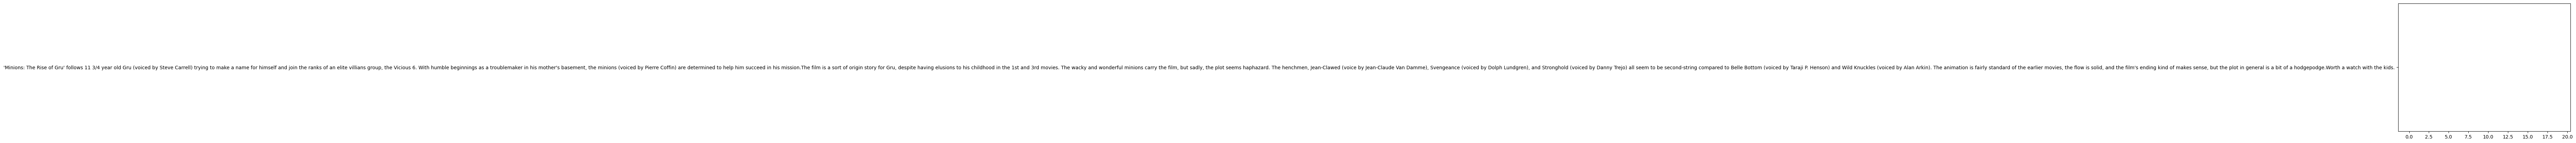

In [267]:
plt.bar(np.arange(20), df.reviews.tolist()[1])


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [268]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [269]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df.reviews.tolist())
freq = topic_model.get_topic_info(); freq.head(5)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-04-03 04:57:24,903 - BERTopic - Transformed documents to Embeddings
2023-04-03 04:57:29,368 - BERTopic - Reduced dimensionality
2023-04-03 04:57:29,385 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name
0,-1,23,-1_the_and_to_of


In [270]:
topic_model.get_topic(-1)


[('the', 0.18359783858097226),
 ('and', 0.11387331181276966),
 ('to', 0.1075217289581238),
 ('of', 0.09943128486715969),
 ('is', 0.07295108758871546),
 ('this', 0.06752748773674284),
 ('in', 0.059366218179120765),
 ('that', 0.05676792773139494),
 ('it', 0.05143241368487473),
 ('for', 0.04937980310961914)]

In [271]:
topic_model.visualize_term_rank()


In [272]:
topic_model.update_topics(df.reviews.tolist(), n_gram_range=(1, 2))
topic_model.visualize_term_rank()

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [273]:
# Write your answer here (no code needed for this question)

'''
The results of the modelling algorithms are compared 

LSA: latent semantic analysis, This uses matrix decomposition to model subjects, which are then defined by loadings upon terms (dimensional reduction).
Its loadings can have negative values that are more difficult to understand. The two primary inputs are corpus and dictionary.

LDA: Latent Dirichlet allocation, The words mentioned in the text are probably related to other terms from the same documents because of latent Dirichlet allocation.
The key feature is that it can handle complex words with effortlessly.The product reviews for first and last place are quite similar for all three.
LDA offers better outcomes than LDA and BERT because it has the capacity to dissect the original matrix document to use an information extraction strategy while keeping crucial subjects.
'''

'\nThe results of the modelling algorithms are compared \n\nLSA: latent semantic analysis, This uses matrix decomposition to model subjects, which are then defined by loadings upon terms (dimensional reduction).\nIts loadings can have negative values that are more difficult to understand. The two primary inputs are corpus and dictionary.\n\nLDA: Latent Dirichlet allocation, The words mentioned in the text are probably related to other terms from the same documents because of latent Dirichlet allocation.\nThe key feature is that it can handle complex words with effortlessly.The product reviews for first and last place are quite similar for all three.\nLDA offers better outcomes than LDA and BERT because it has the capacity to dissect the original matrix document to use an information extraction strategy while keeping crucial subjects.\n'